In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

# Load dataset
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv')



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
no_unique = [data['is_patient'].unique()]

print(no_unique)

[array([1, 2])]


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])


In [ ]:
from imblearn.over_sampling import RandomOverSampler
#Assuming "is_patient" is the target column
# X = data.drop(columns=['is_patient'])  # Features
# y = data['is_patient']  # Target variable

from 416 are positive/disease cases, and 167 are
controlled cases to
 832 cases, of which
416 were disease/positive cases and 416 were non-disease/negative
cases

In [ ]:
data['is_patient'].value_counts()

is_patient
1    416
2    167
Name: count, dtype: int64

In [ ]:
# y.map({1: 1, 2: 0})

In [ ]:

# Count the number of positive and negative cases
num_positive_cases = (y == 1).sum()
num_negative_cases = (y == 2).sum()

# Calculate the desired number of samples for each class
desired_num_samples = max(num_positive_cases, num_negative_cases)

# Resample the data to balance the classes
ros = RandomOverSampler(sampling_strategy={1: desired_num_samples, 2: desired_num_samples})
X_resampled, y_resampled = ros.fit_resample(X, y)

# Change 2 to 0 in y_resampled
y_resampled[y_resampled == 2] = 0

# Count the number of positive and negative cases after resampling
num_positive_cases_resampled = (y_resampled == 1).sum()
num_negative_cases_resampled = (y_resampled == 0).sum()

print("Number of positive cases after random oversampling:", num_positive_cases_resampled)
print("Number of negative cases after random oversampling:", num_negative_cases_resampled)

Number of positive cases after random oversampling: 416
Number of negative cases after random oversampling: 416


In [ ]:
X_resampled

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
827,42,1,0.8,0.2,198,29,19,6.6,3.0,0.80
828,38,1,1.5,0.4,298,60,103,6.0,3.0,1.00
829,33,1,0.8,0.2,198,26,23,8.0,4.0,1.00
830,45,1,1.3,0.6,166,49,42,5.6,2.5,0.80


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

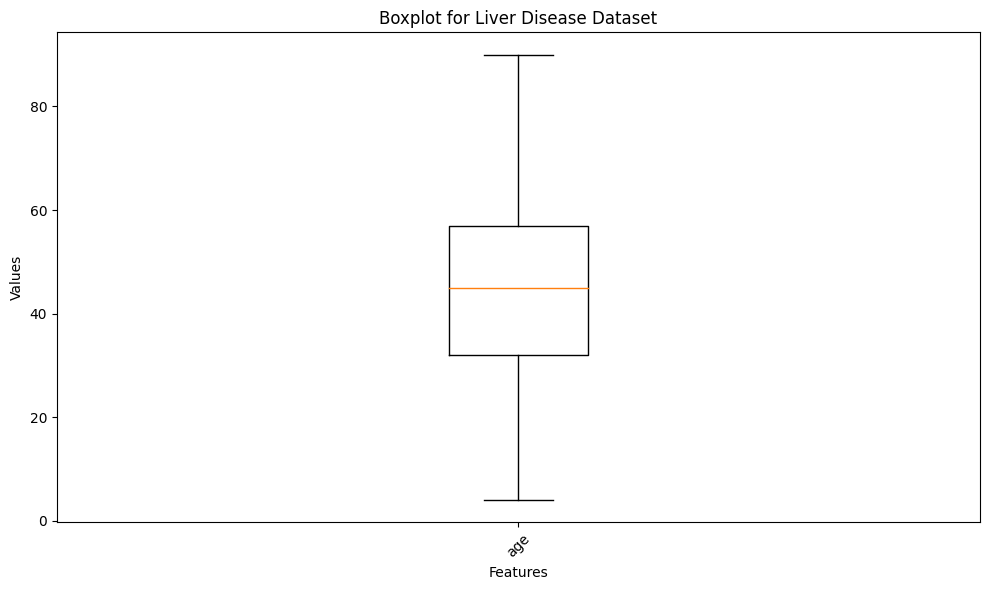

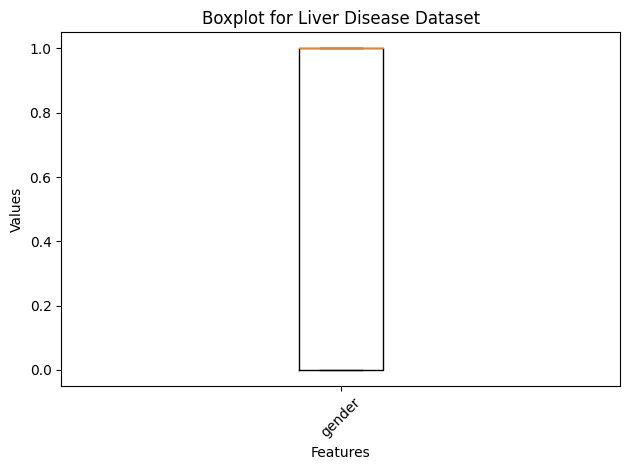

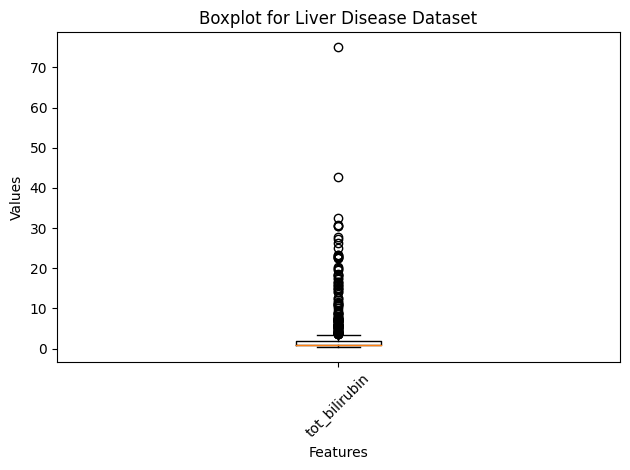

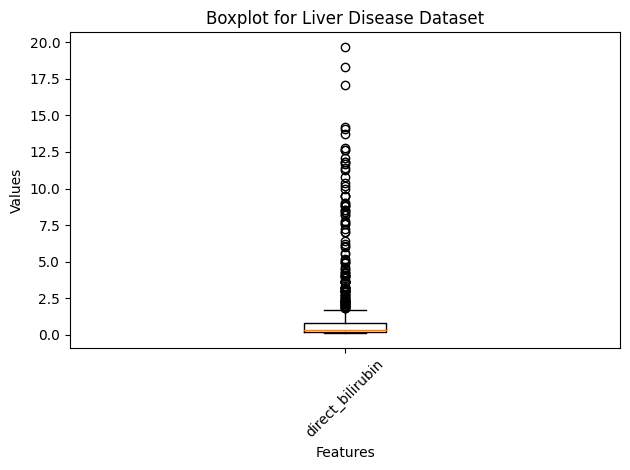

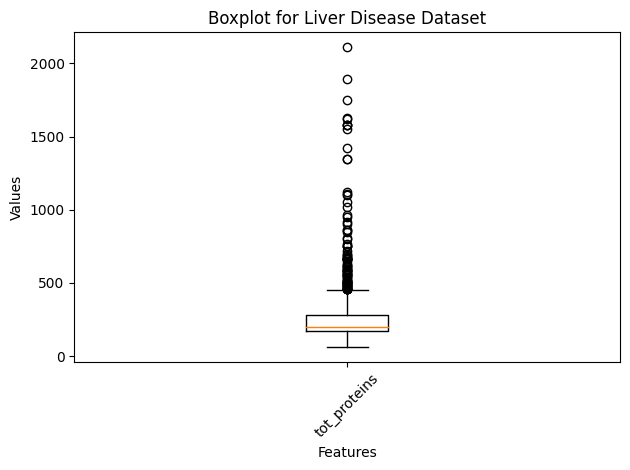

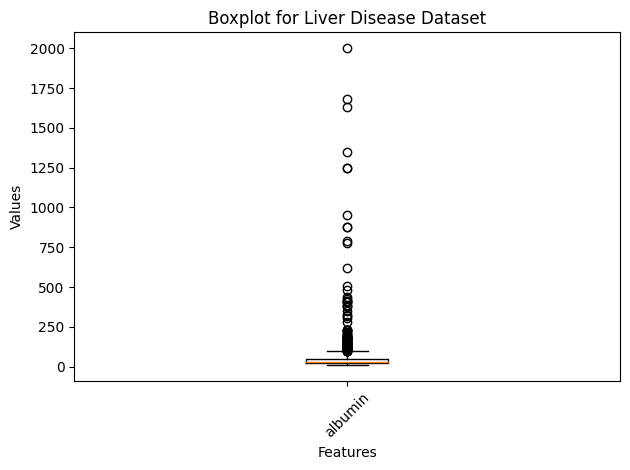

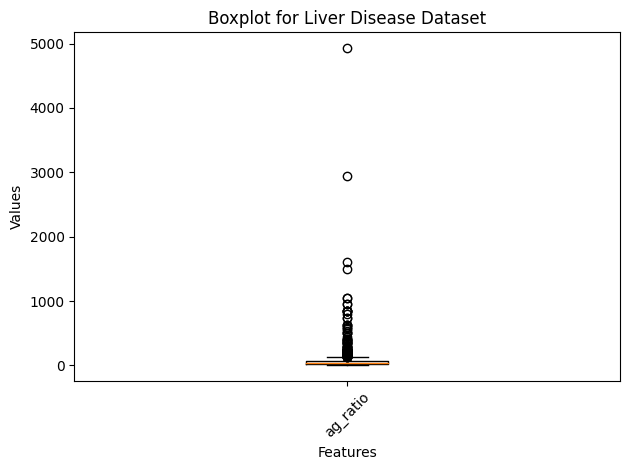

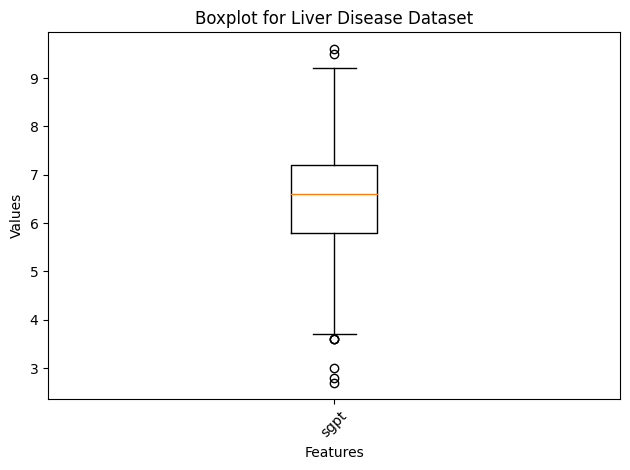

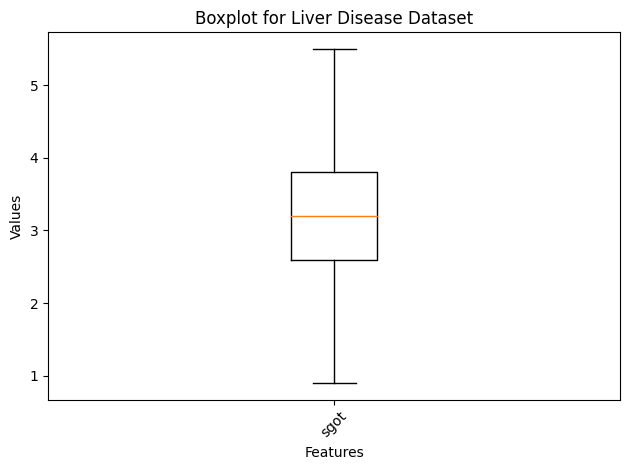

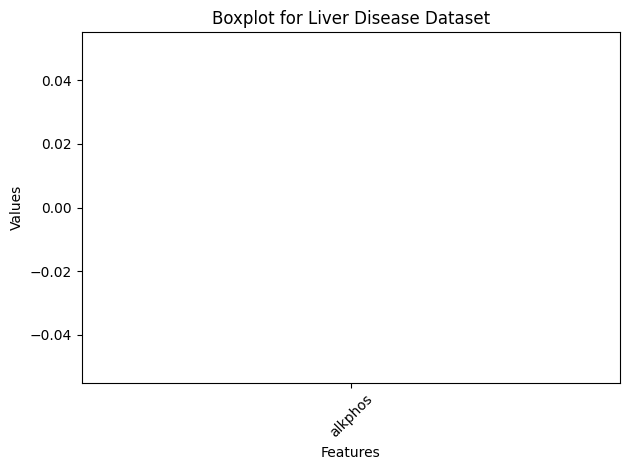

In [ ]:

# Selecting columns for boxplot
columns_for_boxplot = ['age', 'gender', 'tot_bilirubin', 'direct_bilirubin',
                       'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos']

# Creating the boxplot
plt.figure(figsize=(10, 6))

for column in columns_for_boxplot:
    plt.boxplot(X_resampled[column], labels=[column])
    plt.title('Boxplot for Liver Disease Dataset')
    plt.ylabel('Values')
    plt.xlabel('Features')
    plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
    plt.tight_layout()
    plt.show()


Analyzing feature: age


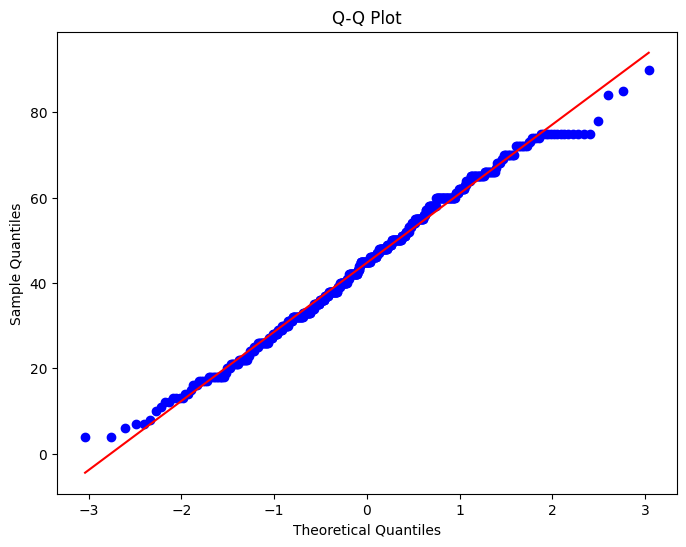

Statistic: 0.9921649694442749, p-value: 0.003669116646051407
The data is not normally distributed (reject H0)
Analyzing feature: gender


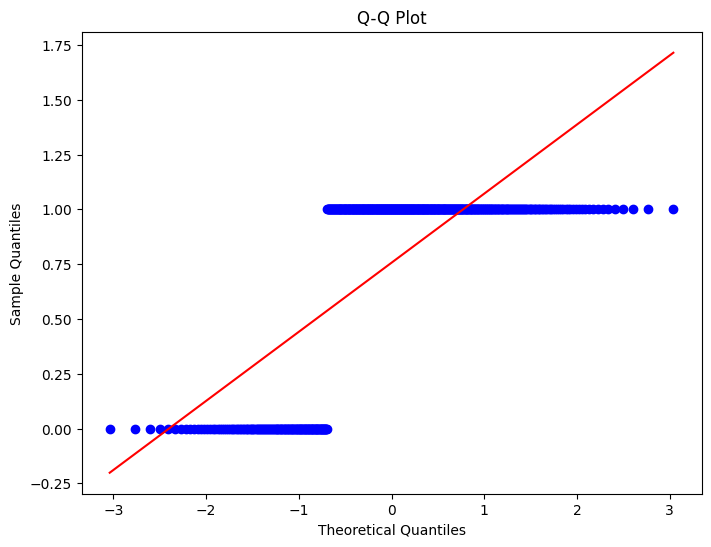

Statistic: 0.5328813791275024, p-value: 1.441348964523297e-36
The data is not normally distributed (reject H0)
Analyzing feature: tot_bilirubin


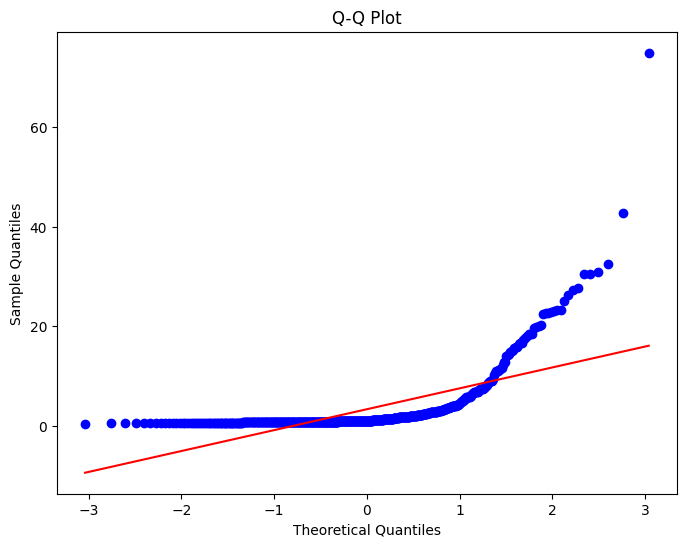

Statistic: 0.45977210998535156, p-value: 1.5773978206485132e-38
The data is not normally distributed (reject H0)
Analyzing feature: direct_bilirubin


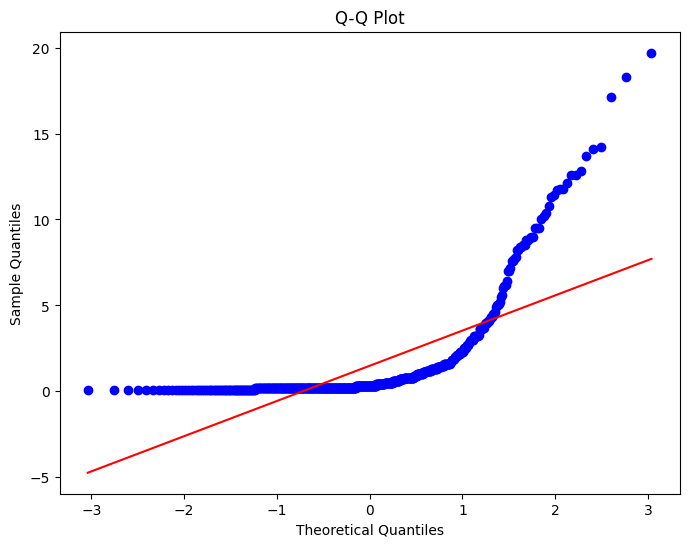

Statistic: 0.5295112133026123, p-value: 1.1563177719145935e-36
The data is not normally distributed (reject H0)
Analyzing feature: tot_proteins


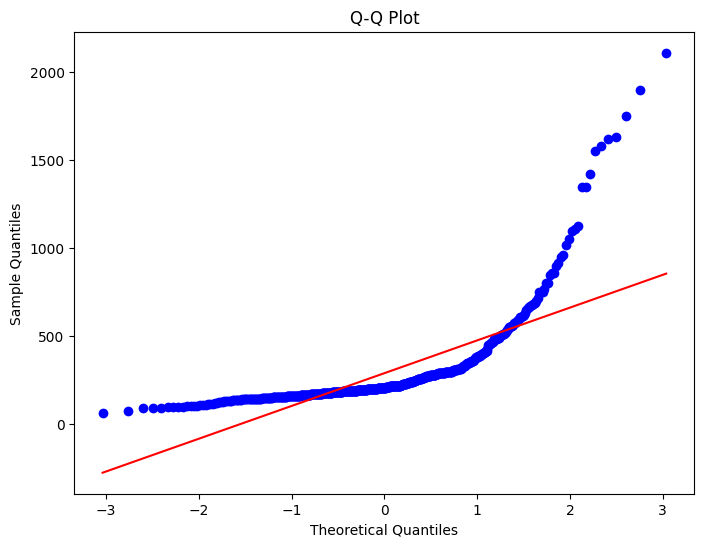

Statistic: 0.5850895643234253, p-value: 5.217479889760206e-35
The data is not normally distributed (reject H0)
Analyzing feature: albumin


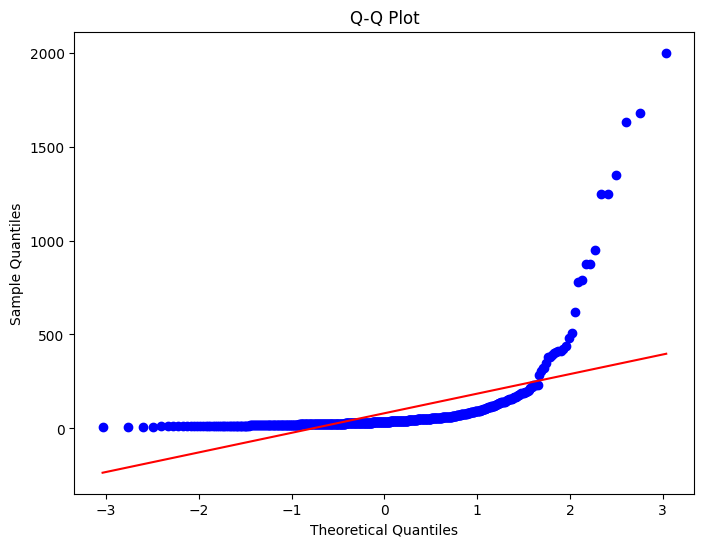

Statistic: 0.32765698432922363, p-value: 1.402699762789142e-41
The data is not normally distributed (reject H0)
Analyzing feature: ag_ratio


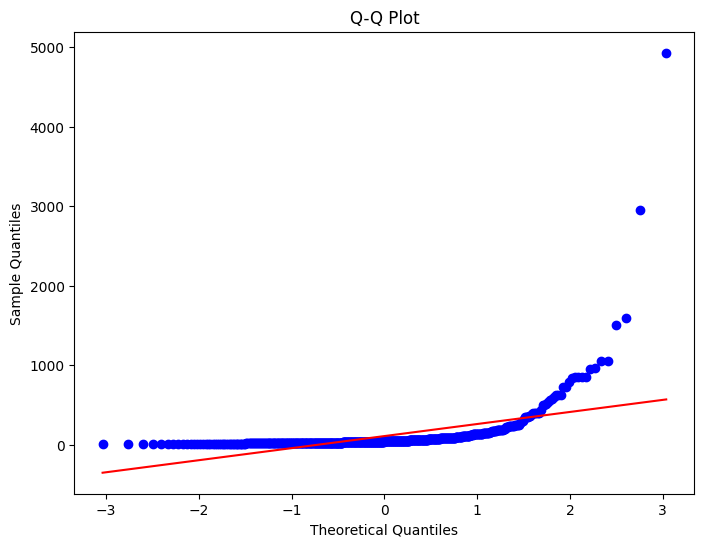

Statistic: 0.2802243232727051, p-value: 1.4839750737199813e-42
The data is not normally distributed (reject H0)
Analyzing feature: sgpt


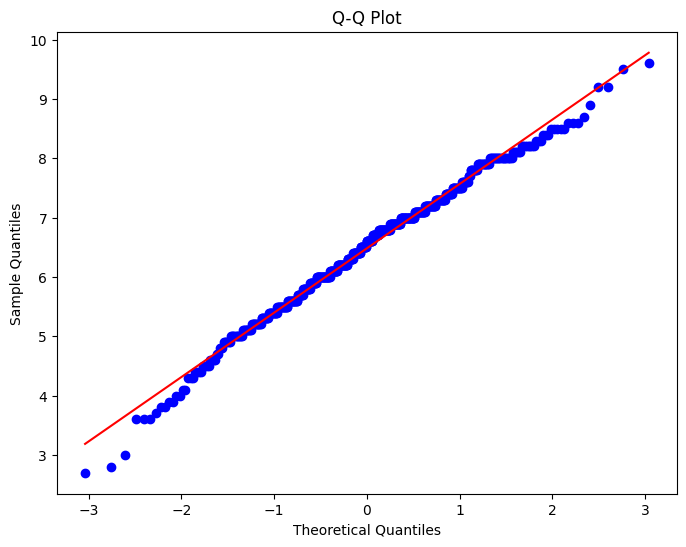

Statistic: 0.9921780824661255, p-value: 0.0037137106992304325
The data is not normally distributed (reject H0)
Analyzing feature: sgot


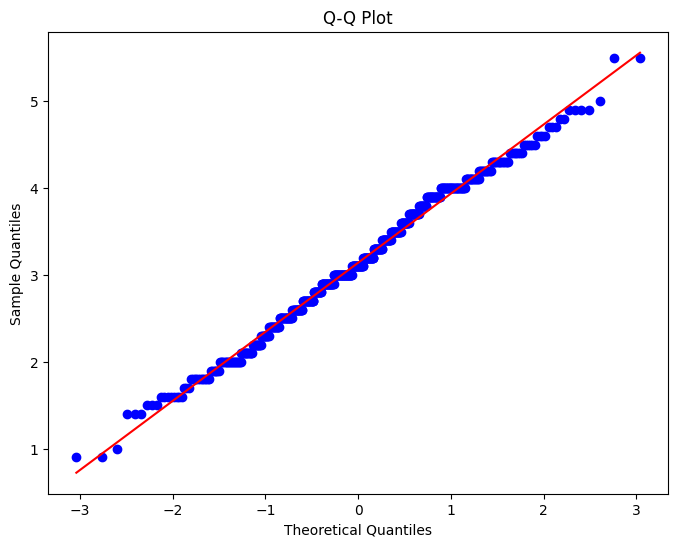

Statistic: 0.9927358031272888, p-value: 0.0062446389347314835
The data is not normally distributed (reject H0)
Analyzing feature: alkphos


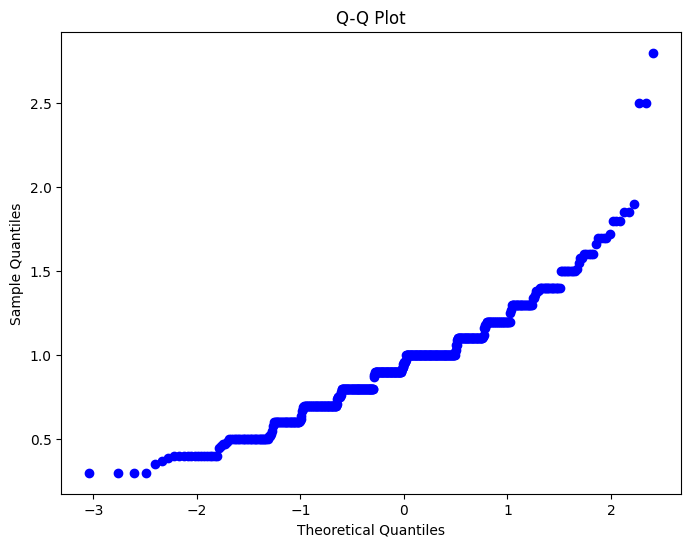

Statistic: nan, p-value: 1.0
The data is normally distributed (fail to reject H0)


In [ ]:
# Function to plot Q-Q plot
def qq_plot(data):
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

# Function to perform Shapiro-Wilk test
def shapiro_wilk_test(data):
    stat, p_value = stats.shapiro(data)
    print(f'Statistic: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print("The data is normally distributed (fail to reject H0)")
    else:
        print("The data is not normally distributed (reject H0)")

for feature in X.columns:
    print(f"Analyzing feature: {feature}")
    feature_data = X[feature]
    qq_plot(feature_data)
    shapiro_wilk_test(feature_data)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils import resample
import numpy as np
import pandas as pd

# Impute missing values with the median (second quartile)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(X_resampled), columns=X_resampled.columns)

# Detect and handle outliers
z_scores = np.abs((data_imputed - data_imputed.mean()) / data_imputed.std())
data_no_outliers = data_imputed[(z_scores < 3).all(axis=1)]

# Standardize the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_no_outliers), columns=data_no_outliers.columns)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
pca_features = pca.fit_transform(data_scaled)

# Assuming you have already defined the number of components required to retain 95% variance
n_components = 10  # Adjust as needed

# Perform Factor Analysis
fa = FactorAnalysis(n_components=n_components)
fa.fit(data_scaled)

# Get the transformed features
fa_features = fa.transform(data_scaled)



In [ ]:
fa_features

In [ ]:
# Calculate the explained variance
explained_variance = np.var(fa_features, axis=0)

# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()


AxisError: axis 0 is out of bounds for array of dimension 0

In [ ]:
X_resampled

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
827,42,1,0.8,0.2,198,29,19,6.6,3.0,0.80
828,38,1,1.5,0.4,298,60,103,6.0,3.0,1.00
829,33,1,0.8,0.2,198,26,23,8.0,4.0,1.00
830,45,1,1.3,0.6,166,49,42,5.6,2.5,0.80


In [ ]:
data_scaled

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,1.268815,-1.636895,-0.447418,-0.506702,-0.403227,-0.580705,-0.517064,0.273155,0.071271,-0.287906
1,1.091272,0.610913,4.275940,4.131010,3.529930,0.342222,0.507156,0.944260,-0.056188,-0.837796
2,1.091272,0.610913,2.608873,2.928640,1.924403,0.265311,0.107460,0.464899,0.071271,-0.322274
3,0.854548,0.610913,-0.308495,-0.249051,-0.441637,-0.619160,-0.492083,0.273155,0.198729,0.055776
4,1.683083,0.610913,1.034420,1.125086,-0.341772,-0.369201,-0.004954,0.752515,-1.075857,-2.006312
...,...,...,...,...,...,...,...,...,...,...
764,-0.092350,0.610913,-0.401110,-0.420818,-0.318726,-0.330745,-0.504573,0.081410,-0.311105,-0.631587
765,-0.329075,0.610913,-0.076958,-0.249051,0.449469,0.265311,0.544627,-0.493823,-0.311105,0.055776
766,-0.624980,0.610913,-0.401110,-0.420818,-0.318726,-0.388428,-0.454611,1.423621,0.963482,0.055776
767,0.085193,0.610913,-0.169573,-0.077284,-0.564548,0.053807,-0.217292,-0.877311,-0.948399,-0.631587


In [ ]:
# LDA - Assuming target column is named 'target'
lda = LDA(n_components=1)  # C-1 where C is the number of classes
lda_features = lda.fit_transform(data_scaled, y_resampled )

# Combine extracted features
combined_features = np.hstack((pca_features, fa_features, lda_features))
# Combine into a single DataFrame
combined_data = pd.DataFrame(combined_features)
combined_data['target'] = y_resampled

# Separate majority and minority classes
majority_class = combined_data[combined_data['target'] == 0]
minority_class = combined_data[combined_data['target'] == 1]



ValueError: Found input variables with inconsistent numbers of samples: [769, 832]

In [ ]:
combined_data

In [ ]:
# Upsample minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match number in majority class
                              random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Shuffle the dataset
upsampled_data = upsampled_data.sample(frac=1).reset_index(drop=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Separate features (X) and target variable (y)
X_upsampled = upsampled_data.drop(columns=['target'])
y_upsampled = upsampled_data['target']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_upsampled,y_upsampled, test_size=0.25, random_state=42, stratify=y)

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
mlp = MLPClassifier(random_state=42)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, auc

# Train-test split evaluation
models = {
    "Logistic Regression": log_reg,
    "K-Nearest Neighbors": knn,
    "Random Forest": rf,
    "SVM": svm,
    "MLP": mlp
}

train_test_results = {}
for name, model in models.items():
    results = evaluate_model(model, X_train, X_test, y_train, y_test)
    train_test_results[name] = results

# 10-fold cross-validation
def cross_val_evaluate_model(model, X, y):
    accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y, cv=10, scoring='precision').mean()
    recall = cross_val_score(model, X, y, cv=10, scoring='recall').mean()
    f1 = cross_val_score(model, X, y, cv=10, scoring='f1').mean()
    auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()
    return accuracy, precision, recall, f1, auc

cross_val_results = {}
for name, model in models.items():
    results = cross_val_evaluate_model(model, X, y)
    cross_val_results[name] = results

# Ensemble classifier (example with majority voting)
ensemble = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('knn', knn),
    ('rf', rf),
    ('svm', svm),
    ('mlp', mlp)
], voting='soft')

# Evaluate ensemble classifier
ensemble_results = evaluate_model(ensemble, X_train, X_test, y_train, y_test)
ensemble_cross_val_results = cross_val_evaluate_model(ensemble, X, y)

# Print results
print("Train-Test Split Results")
for name, results in train_test_results.items():
    print(f"{name}: Accuracy={results[0]:.2f}, Precision={results[1]:.2f}, Recall={results[2]:.2f}, F1-Score={results[3]:.2f}, AUC={results[4]:.2f}")

print("\n10-Fold Cross-Validation Results")
for name, results in cross_val_results.items():
    print(f"{name}: Accuracy={results[0]:.2f}, Precision={results[1]:.2f}, Recall={results[2]:.2f}, F1-Score={results[3]:.2f}, AUC={results[4]:.2f}")

print("\nEnsemble Classifier Results (Train-Test Split):")
print(f"Accuracy={ensemble_results[0]:.2f}, Precision={ensemble_results[1]:.2f}, Recall={ensemble_results[2]:.2f}, F1-Score={ensemble_results[3]:.2f}, AUC={ensemble_results[4]:.2f}")

print("\nEnsemble Classifier Results (10-Fold Cross-Validation):")
print(f"Accuracy={ensemble_cross_val_results[0]:.2f}, Precision={ensemble_cross_val_results[1]:.2f}, Recall={ensemble_cross_val_results[2]:.2f}, F1-Score={ensemble_cross_val_results[3]:.2f}, AUC={ensemble_cross_val_results[4]:.2f}")
